In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [86]:
def warmUp(n_servers, n_customers):
    
    lambda_customer = 0.125
    lambda_server = 0.1
    
    customer = np.random.exponential(lambda_customer)
    
    server_times = [10000000000] * n_servers
    server_statuses = [0] * n_servers
    next_server_idx = 0
    next_server_t = 1000000
    ques = [[]] * n_servers
    times = []
    arrivals = []
    t = 0
        
    while len(times) < n_customers:
        
        if customer < next_server_t:
            arrivals.append(customer)
            if server_statuses[0] == 0:
                server_times[0] = customer + np.random.exponential(lambda_server)
                server_statuses[0] = 1
            else:
                ques[0].append(1)
            
            t = customer 
            customer = t + np.random.exponential(lambda_customer)
            
            next_server_t = min(server_times)
            next_server_idx = server_times.index(next_server_t)
        else:
            if next_server_idx == n_servers - 1:
                times.append(next_server_t)   
            elif server_statuses[next_server_idx + 1] == 0:
                server_times[next_server_idx + 1] = next_server_t + np.random.exponential(lambda_server)
                server_statuses[next_server_idx + 1] = 1
            else:
                ques[next_server_idx + 1].append(1)
                 
            if len(ques[next_server_idx]) > 0:
                server_times[next_server_idx] = next_server_t + np.random.exponential(lambda_server)
                ques[next_server_idx].pop(0)
            else:
                server_times[next_server_idx] = 10000000
                server_statuses[next_server_idx] = 0
            
            t = next_server_t 
            
            next_server_t = min(server_times)
            next_server_idx = server_times.index(next_server_t)    
    return np.array(times) - np.array(arrivals)[0:len(times)]

In [89]:
times = warmUp(5, 100)

In [30]:
%matplotlib inline

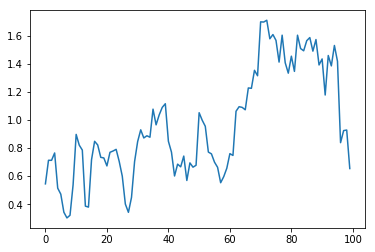

In [90]:
plt.plot(times)

In [60]:
[[]]*10

[[], [], [], [], [], [], [], [], [], []]